In [5]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_boston


import warnings
warnings.filterwarnings("ignore")

0.0
1.0
0.24197072451914337


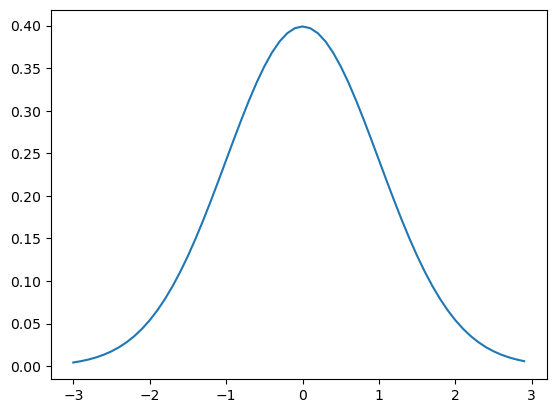

In [4]:
sn = stats.norm(loc = 0, scale = 1)
print(sn.mean())
print(sn.std())
print(sn.pdf(x = 1))

x_plot = np.arange(-3.0, 3.0, 0.1)
plt.plot(x_plot, stats.norm.pdf(loc = 0, scale = 1, x= x_plot))

<AxesSubplot:ylabel='Density'>

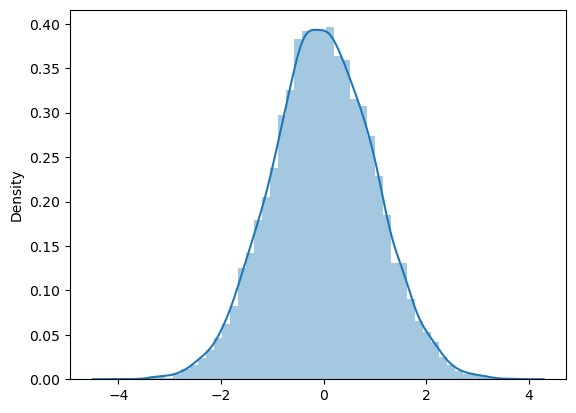

In [5]:
sn = stats.norm.rvs(loc = 0, scale = 1, size = 10000)

sn.mean()
sn.std()
sns.distplot(sn)

<AxesSubplot:ylabel='Density'>

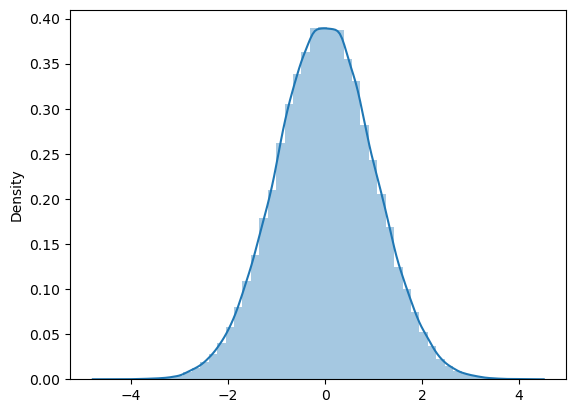

In [6]:
nr = np.random.randn(100000)
sns.distplot(nr)

<AxesSubplot:>

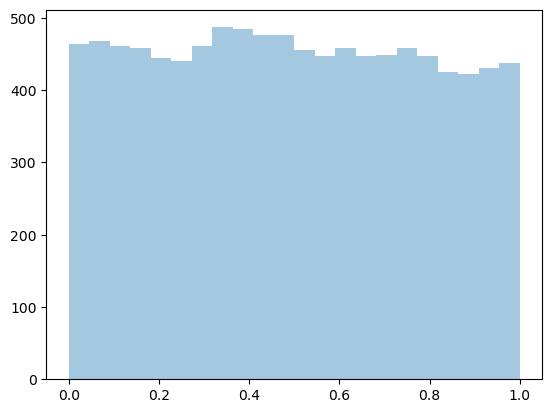

In [7]:
nr1 = np.random.rand(10000)
sns.distplot(nr1, kde = False)

기계 학습 알고리즘은 종종 입력 데이터를 2차원 배열 형태로 받습니다. 일반적으로 각 행(row)은 개별 샘플(sample)을 나타내고, 각 열(column)은 특성(feature)을 나타냅니다.

이 경우 X는 100x1의 2차원 배열입니다. 100은 데이터의 샘플 개수를 나타내고, 1은 특성의 개수를 나타냅니다. 즉, 이 데이터 세트에는 100개의 샘플과 1개의 특성이 있습니다.

만약 X를 1차원 배열로 만든다면, 그것은 100개의 원소를 가진 배열이 될 것입니다. 이것은 여전히 100개의 샘플을 나타냅니다만, 이는 대부분의 기계 학습 알고리즘에 직접적으로 입력으로 사용될 수 없습니다. 그 이유는 대부분의 알고리즘이 예상하고 있는 데이터의 형태가 각 샘플의 특성들을 포함하는 2차원 배열이기 때문입니다.

따라서 X를 2차원 배열로 만드는 이유는 이러한 기계 학습 알고리즘과의 호환성을 유지하기 위한 것입니다.

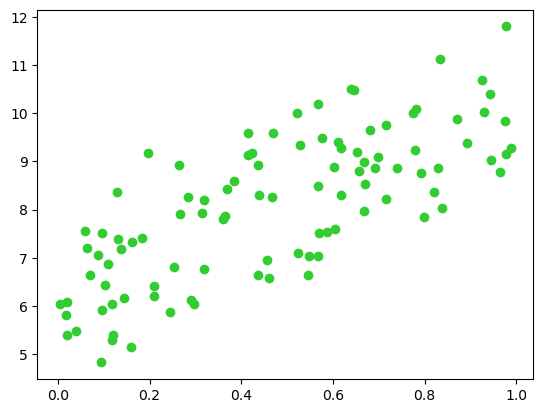

In [9]:
import pandas as pd

np.random.seed(0)
x = np.random.rand(100,1)
y = 6 + 4* x+np.random.randn(100,1)

plt.scatter(x,y, c = "limegreen")

[비용 최소화]  

- 비용함수 R(w)는 변수가 w 파라미터로 이뤄진 함수이며 R(w)를 최소화하는 w0와 w1의 값은 R(w)를 w0, w1으로 순차적으로 편미분해 얻을 수 있다.  
 w1 편미분값 : $-2/N*sigmax*diff$, w0 편미분값 : $-2/N*sigma*diff$
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결과값을 마이너스 하면서 적용한다. 
- 편미분값이 너무 클 수 있기 때문에 보정 계수를 곱하는데 이를 학습률이라고 한다.

In [10]:
def get_weight_updates(w1, w0, x, y, learning_rate = 0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(x, w1.T) + w0
    diff = y - y_pred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(x.T , diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    return w1_update, w0_update

In [11]:
def gradient_descent_steps(x, y, iters = 10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, x, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [13]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [14]:
w1, w0 = gradient_descent_steps(x, y, iters = 1000)
print(f"w1 : {w1[0,0]: .4f}, w0 : {w0[0,0]: .4f}")
y_pred = w1[0,0] * x + w0
print(f"GD Total cost = {get_cost(y, y_pred) : .4f}")

w1 :  3.7740, w0 :  6.3047
GD Total cost =  0.9947


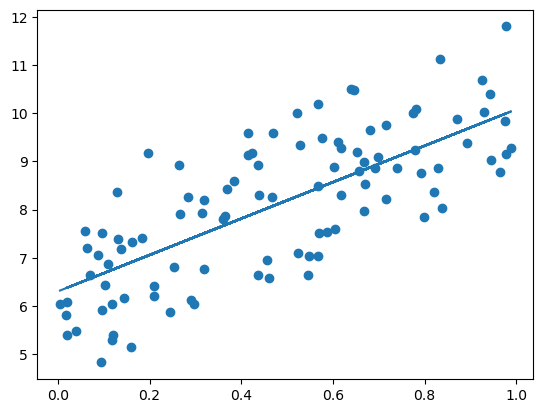

In [21]:
plt.scatter(x,y)
plt.plot(x,y_pred)

In [30]:
def stochastic_gradient_descent_steps(x, y , batch_size = 10, iters = 1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(x.shape[0])
        sample_x = x[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update , w0_update = get_weight_updates(w1, w0, sample_x, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [31]:
w1, w0 = stochastic_gradient_descent_steps(x, y, iters = 1000)
print(f"w1 : {w1[0,0]: .4f}, w0 : {w0[0,0] : .4f}")
y_pred = w1[0,0] * x + w0
print(f"Stochastic Gradient Descent Total Cost : {get_cost(y, y_pred):.4f}")

w1 :  3.7898, w0 :  6.2909
Stochastic Gradient Descent Total Cost : 0.9942


In [1]:
#!pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
async-generator               1.10
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkc

In [3]:
#!pip install scikit-learn==1.1.0

     ---------------------------------------- 7.3/7.3 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [4]:
import sklearn
sklearn.__version__

'1.1.0'

In [6]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF["PRICE"] = boston.target
print('Boston 데이터셋 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [7]:
bostonDF.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


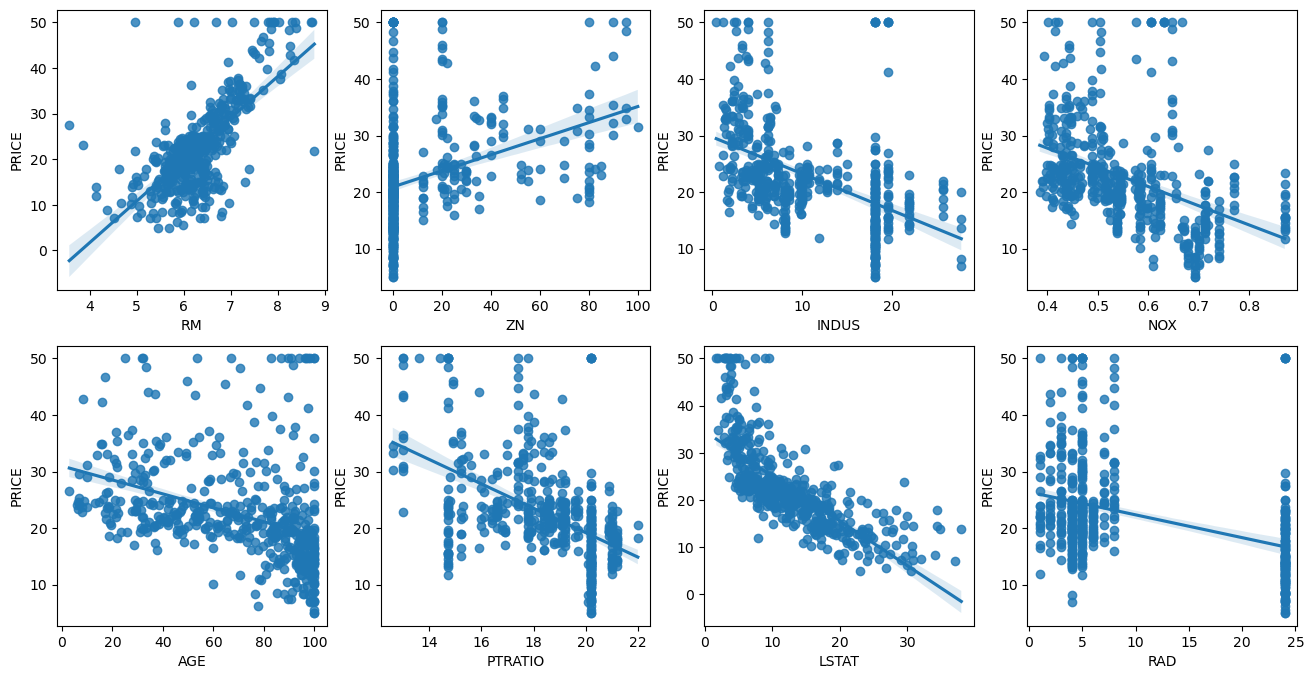

In [11]:
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ["RM","ZN","INDUS","NOX","AGE","PTRATIO","LSTAT","RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(data = bostonDF, x = feature, y = "PRICE", ax = axs[row][col])
    
fig1 = plt.gcf()
fig1.savefig("p322_boston.tif", format = "tif", dpi = 300, bbox_inches = "tight")

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
y_target = bostonDF["PRICE"]
x_data = bostonDF.drop(["PRICE"], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.3, random_state = 156)


lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.4f}, RMSE : {rmse:.4f}")
print(f"Variance score : {r2_score(y_test, y_preds):.4f}")

MSE : 17.2969, RMSE : 4.1590
Variance score : 0.7572


In [16]:
print("절편 값 : ", lr.intercept_)
print("회귀 계수값 : ", np.round(lr.coef_, 1))

절편 값 :  40.99559517216412
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [17]:
coeff = pd.Series(data = np.round(lr.coef_, 1), index = x_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [20]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE socres : ", np.round(neg_mse_scores, 2))
print(" 5 folds 의 개별 RMSE scores : ", np.round(rmse_scores, 2))
print(f" 5 folds 의 개별 RMSE : {avg_rmse:.4f}")

 5 folds 의 개별 Negative MSE socres :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 개별 RMSE : 5.8287


In [21]:
y_target = bostonDF["PRICE"]
x_data = bostonDF[["LSTAT","RM"]]

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.3, random_state = 156)


lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.4f}, RMSE : {rmse:.4f}")
print(f"Variance score : {r2_score(y_test, y_preds):.4f}")

MSE : 22.1131, RMSE : 4.7025
Variance score : 0.6896


In [22]:
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(" 5 folds 의 개별 Negative MSE socres : ", np.round(neg_mse_scores, 2))
print(" 5 folds 의 개별 RMSE scores : ", np.round(rmse_scores, 2))
print(f" 5 folds 의 개별 RMSE : {avg_rmse:.4f}")

 5 folds 의 개별 Negative MSE socres :  [-11.79 -28.97 -47.84 -71.77 -36.61]
 5 folds 의 개별 RMSE scores :  [3.43 5.38 6.92 8.47 6.05]
 5 folds 의 개별 RMSE : 6.0511
